In [91]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime 

LOWER_THRESHOLD = 5

Source of data https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [92]:
data = pd.read_csv('./data/data.csv')
data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,3/15/20,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
1,3/11/20,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,3/8/20,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,3/2/20,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
4,3/1/20,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA


Source of population data https://data.worldbank.org/indicator/SP.POP.TOTL

In [93]:
population = pd.read_csv('./data/population.csv')
population.head()


"""
Map countries that have different names in the datasets
"""
cmap = {
    "Cote dIvoire": "Cote d'Ivoire",
    "Czech republic": "Czech Republic",
    "Democratic Republic of the Congo": "Congo, Dem. Rep.",
    "Egypt": "Egypt, Arab Rep.",
    "Iran": 'Iran, Islamic Rep.',
    "Russia": "Russian Federation",
    "Slovakia": "Slovak Republic",
    "South Korea": "Korea, Rep.",
    "United States of America": "United States",
    "United kingdom": "United Kingdom",
    "Venezuela": "Venezuela, RB",
    "switzerland": "Switzerland"
}

p2018 = {r['Country Name']: r['2018'] for _, r in population.iterrows()}

data['population'] = data['CountryExp'].apply(lambda c: p2018.get(cmap.get(c, c), 1) / 10 ** 6)

Outbreaks occur at differnt times in different countries. 
To be able to compare trajectories, day 0 for each country is considered the day,
when there were more than `LOWER_THRESHOLD` cases registered .

In [94]:
def pre_process(data):    
    data['date'] = data['DateRep'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
    data = data.sort_values(by=['CountryExp', 'date'])
    countries = data['CountryExp'].unique()
    stepData = []

    for country in countries:
        ind = 0
        total = 0
        total_deceased = 0
        
        for _, row in data[data.CountryExp == country].iterrows():        
            total += row['NewConfCases']
            total_deceased += row['NewDeaths']
              
            if row['NewConfCases'] > 5:
                stepData.append({
                    'country': country,
                    'days': ind,
                    'total': total,
                    'total_deceased': total_deceased,
                    'new': row['NewConfCases'],
                    'new_deceased': row['NewDeaths'],                                        
                    'population': row['population'],
                })

                ind += 1

    df = pd.DataFrame(stepData, columns=[
        'country', 'new', 'total', 'days', 'new_deceased', 'total_deceased', 
        'total_per_mil', 'new_per_mil', 'new_deceased_per_mil', 'total_deceased_per_mil', 'population'
    ])
    
    for c in ['new', 'total', 'days', 'new_deceased', 'total_deceased']:
        df['{}_per_mil'.format(c)] = df[c] / df['population']
        
    return df

In [95]:
df = pre_process(data)
df.head()




,country,new,total,days,new_deceased,total_deceased,total_per_mil,new_per_mil,new_deceased_per_mil,total_deceased_per_mil,population,days_per_mil
0,Albania,12,23,0,0.0,1.0,8.024069,4.186471,0.0,0.348873,2.866376,0.000000
1,Albania,10,33,1,0.0,1.0,11.512795,3.488726,0.0,0.348873,2.866376,0.348873
2,Algeria,7,12,0,0.0,0.0,0.284169,0.165765,0.0,0.000000,42.228429,0.000000
3,Algeria,11,37,1,0.0,2.0,0.876187,0.260488,0.0,0.047361,42.228429,0.023681
4,Argentina,6,8,0,0.0,0.0,0.179797,0.134848,0.0,0.000000,44.494502,0.000000


In [96]:
def plot_countries(df, metric, *countries):
    colors = list(matplotlib.colors.BASE_COLORS.keys())
    fig, ax = plt.subplots()
    
    for index, country in enumerate(countries):
        data = df[df.country == country]
        ax.plot(data.days, data[metric], label=country)
    
    fig.set_size_inches(18.5, 10.5)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.show()

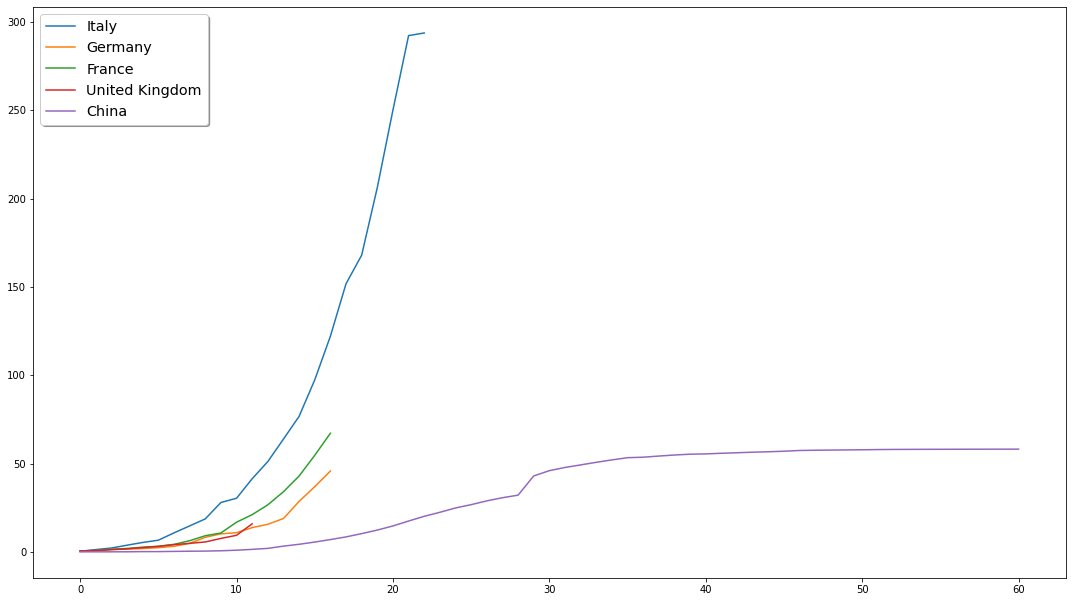

In [98]:
plot_countries(df, 'total_per_mil', 'Italy', 'Germany', 'France', 'United Kingdom', 'China')

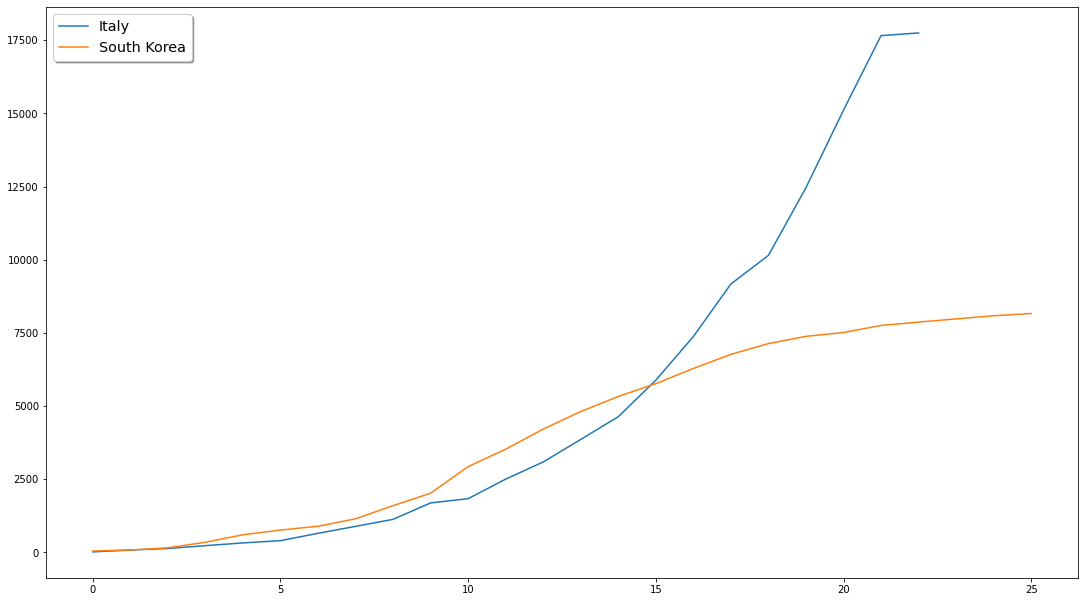

In [85]:
plot_countries(df, 'total', 'Italy', 'South Korea')

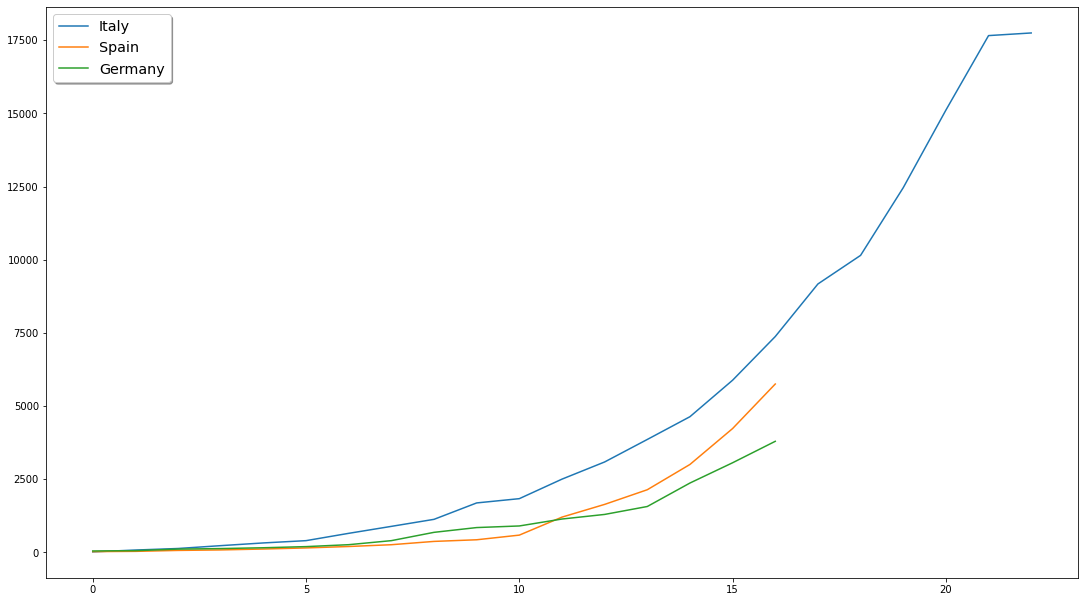

In [86]:
plot_countries(df, 'total', 'Italy', 'Spain', 'Germany')

In [87]:
df[df.country == 'Iran']

,country,new,total,days,new_deceased,total_deceased,total_per_mil,new_per_mil,new_deceased_per_mil,total_deceased_per_mil,population,days_per_mil
264,Iran,13,18,0,2.0,4.0,0.220048,0.158924,0.024450,0.048900,81.800269,0.000000
265,Iran,10,28,1,1.0,5.0,0.342297,0.122249,0.012225,0.061124,81.800269,0.012225
266,Iran,15,43,2,3.0,8.0,0.525671,0.183373,0.036675,0.097799,81.800269,0.024450
267,Iran,18,61,3,4.0,12.0,0.745719,0.220048,0.048900,0.146699,81.800269,0.036675
268,Iran,34,95,4,3.0,15.0,1.161365,0.415647,0.036675,0.183373,81.800269,0.048900
269,Iran,44,139,5,4.0,19.0,1.699261,0.537896,0.048900,0.232273,81.800269,0.061124
270,Iran,106,245,6,7.0,26.0,2.995100,1.295839,0.085574,0.317847,81.800269,0.073349
271,Iran,143,388,7,8.0,34.0,4.743261,1.748161,0.097799,0.415647,81.800269,0.085574
272,Iran,205,593,8,9.0,43.0,7.249365,2.506104,0.110024,0.525671,81.800269,0.097799
273,Iran,385,978,9,11.0,54.0,11.955951,4.706586,0.134474,0.660145,81.800269,0.110024


In [88]:
df[df.country == 'Germany'] 

,country,new,total,days,new_deceased,total_deceased,total_per_mil,new_per_mil,new_deceased_per_mil,total_deceased_per_mil,population,days_per_mil
216,Germany,26,47,0,0.0,0.0,0.566757,0.313525,0.000000,0.000000,82.927922,0.000000
217,Germany,10,57,1,0.0,0.0,0.687344,0.120587,0.000000,0.000000,82.927922,0.012059
218,Germany,54,111,2,0.0,0.0,1.338512,0.651168,0.000000,0.000000,82.927922,0.024117
219,Germany,18,129,3,0.0,0.0,1.555568,0.217056,0.000000,0.000000,82.927922,0.036176
220,Germany,28,157,4,0.0,0.0,1.893210,0.337643,0.000000,0.000000,82.927922,0.048235
221,Germany,39,196,5,0.0,0.0,2.363498,0.470288,0.000000,0.000000,82.927922,0.060293
222,Germany,66,262,6,0.0,0.0,3.159370,0.795872,0.000000,0.000000,82.927922,0.072352
223,Germany,138,400,7,0.0,0.0,4.823466,1.664096,0.000000,0.000000,82.927922,0.084411
224,Germany,284,684,8,0.0,0.0,8.248127,3.424661,0.000000,0.000000,82.927922,0.096469
225,Germany,163,847,9,0.0,0.0,10.213689,1.965562,0.000000,0.000000,82.927922,0.108528
